In [1]:
import numpy as np
import pandas as pd

# Regressão Linear

In [2]:
# Importando bibliotecas

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Carregando o dataset Boston do sklearn para estimação dos valores de venda de um imóvel (em milhares de dólares)

dataset = load_boston()

In [4]:
# Verificando o shape do dataset: número de instâncias (linhas), número de atributos (colunas)

dataset.data.shape

(506, 13)

In [5]:
# Carregando os atributos de entrada em um Pandas dataframe

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [6]:
# Visualizando as primeiras linhas e colunas do dataframe

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Adicionando a variável de saída ao dataframe criado

df["MEDV"] = dataset.target

In [8]:
# Visualizando as primeiras linhas e colunas do dataframe

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# Verificando se existem colunas com entradas nulas

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
# Avaliando a correlação dos atributos de entrada com a variável-alvo de saída para reduzir dimensionalidade

corr = df.corr() 

print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

# Atributos de interesse:

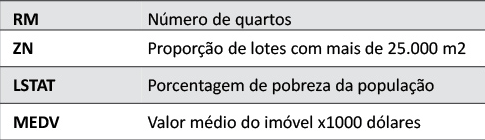

In [11]:
# Criando um dataframe de entrada apenas com um subconjunto dos atributos

X = pd.DataFrame(np.c_[df["LSTAT"], df["RM"], df["ZN"]], columns = ["LSTAT","RM", "ZN"])

In [12]:
# Definindo a variável de saída (preço do imóvel)

y = df["MEDV"]

In [13]:
# Realizando split do dataset em treino (entrada e saída) e teste (entrada e saída)

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [14]:
# Verificando o shape do conjunto de treino de entrada

x_treino.shape

(354, 3)

In [15]:
# Verificando o shape do conjunto de teste de entrada

x_teste.shape

(152, 3)

In [16]:
# Verificando o shape do conjunto de treino de saída (rótulos)

y_treino.shape

(354,)

In [17]:
# Verificando o shape do conjunto de teste de saída (rótulos)

y_teste.shape

(152,)

In [18]:
# Verificando os rótulos do conjunto de entrada de teste de forma ordenada 

np.unique(y_treino)

array([ 5. ,  5.6,  6.3,  7.2,  7.4,  7.5,  8.4,  8.5,  8.7,  8.8,  9.5,
        9.6, 10.2, 10.4, 10.9, 11. , 11.3, 11.5, 11.7, 11.8, 11.9, 12. ,
       12.3, 12.5, 12.6, 12.7, 12.8, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6,
       13.8, 13.9, 14.1, 14.3, 14.4, 14.5, 14.6, 14.8, 14.9, 15. , 15.1,
       15.2, 15.3, 15.4, 15.6, 15.7, 16. , 16.1, 16.2, 16.3, 16.4, 16.5,
       16.6, 16.7, 16.8, 17. , 17.1, 17.2, 17.4, 17.5, 17.7, 17.8, 18. ,
       18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1,
       19.2, 19.3, 19.4, 19.5, 19.6, 19.8, 19.9, 20. , 20.1, 20.2, 20.3,
       20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2, 21.4, 21.6,
       21.7, 21.8, 21.9, 22. , 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8,
       22.9, 23. , 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9,
       24. , 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 25. , 25.2,
       25.3, 26.2, 26.6, 26.7, 27. , 27.1, 27.5, 28. , 28.1, 28.2, 28.4,
       28.5, 28.7, 29. , 29.1, 29.4, 29.6, 29.8, 29

In [20]:
# Verificando os rótulos do conjunto de saída de teste 

np.unique(y_teste)

array([ 7. ,  8.1,  8.3,  8.8,  9.7, 10.4, 10.5, 10.8, 10.9, 11.7, 12.1,
       12.7, 13. , 13.1, 13.3, 13.5, 13.8, 14. , 14.1, 14.2, 14.4, 15. ,
       15.2, 15.4, 15.6, 16.1, 16.2, 16.6, 16.7, 16.8, 17.1, 17.2, 17.3,
       17.4, 17.5, 17.6, 17.8, 17.9, 18.4, 18.6, 18.7, 18.9, 19. , 19.2,
       19.3, 19.4, 19.6, 19.7, 19.8, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7,
       21. , 21.2, 21.4, 21.5, 21.7, 22.1, 22.2, 22.4, 22.5, 22.6, 22.7,
       22.8, 23. , 23.1, 23.2, 23.4, 23.9, 24. , 24.1, 24.3, 24.4, 24.5,
       24.7, 24.8, 25. , 25.1, 26.4, 26.5, 26.6, 27.1, 27.5, 27.9, 28.6,
       29. , 30.1, 30.3, 30.5, 31. , 32.2, 33.2, 33.4, 34.6, 34.9, 35.2,
       36.1, 37.6, 41.3, 43.8, 44.8, 48.8, 50. ])

In [21]:
# Definindo o regressor Linear Regression

Linear_Regression_model = LinearRegression()

In [22]:
# Treinando o regressor Linear Regression

Linear_Regression_model.fit(x_treino, y_treino)

LinearRegression()

In [23]:
# Realizando predições no conjunto de teste

predicoes = Linear_Regression_model.predict(x_teste)

In [24]:
# Obtendo o acerto médio do regressor no conjunto de teste

score = Linear_Regression_model.score(x_teste, y_teste)
print("\nScore do regressor:", score)


Score do regressor: 0.6137630456347534


In [25]:
# Imprimindo as predições do regressor para o conjunto de teste

print(predicoes)

[36.53052117 30.6695763  25.21105554  1.58393692 33.14603458  8.62546898
 29.87820615 27.16264527 25.77432115 21.7921544  31.62371484 22.56652927
 22.35904028 31.05872808 26.93131686 20.29736126  0.51433401 17.56041971
 12.51711523 21.24731464  5.69659588 23.53430843 36.9664496  24.06309986
 31.08483704 13.04717976 26.24429824 22.0191252  26.71225448 29.46602973
 12.0309678  10.83945985 17.91496643 24.83436697 26.45398681 22.59360708
 25.76716819 12.86713808 36.93453143 34.15148075 20.11821034  2.34958977
 26.93364954 16.65425326 26.73827633 30.71861243 -1.65690837 17.26669476
 20.4578429  14.33563561 20.48796718 21.10170804 24.50537747 16.38316515
 17.42252237 28.93189869 35.2050531  19.82386839 28.06127175 20.59648949
 19.86015505 22.49880613 16.45995353 30.38599925 22.14053057 13.18945329
 23.05588776 25.09823733 22.36368148 21.1031335  19.28052763 25.59915124
 16.65376235 20.33518135 19.25929932 31.49287511 19.07354298 13.30584797
 28.45704683 18.89278858 21.74579908 38.00432475 15

In [26]:
# Realizando predição para valores não vistos

caracteristicas = [[4.70, 6.00, 80.00]]

predicao = Linear_Regression_model.predict(caracteristicas)

print (predicao)

[27.67170696]


In [27]:
# Imprimindo os coeficientes aprendidos pelo regressor

Linear_Regression_model.coef_

array([-0.63316605,  4.75852277,  0.02303304])

# Regressão Polinomial

In [28]:
# Importando bibliotecas

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [29]:
# Carregando o dataset Boston do sklearn para estimação dos valores de venda de um imóvel (em milhares de dólares)

dataset = load_boston()

In [30]:
# Carregando os atributos de entrada em um Pandas dataframe

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [31]:
# Adicionando a variável de saída ao dataframe criado

df["MEDV"] = dataset.target

In [32]:
# Criando um dataframe de entrada apenas com um subconjunto dos atributos

X = pd.DataFrame(np.c_[df["LSTAT"], df["RM"], df["ZN"]], columns = ["LSTAT","RM", "ZN"])

In [33]:
# Definindo a variável de saída (preço do imóvel)

y = df["MEDV"]

In [34]:
# Realizando split do dataset em treino (entrada e saída) e teste (entrada e saída)

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [35]:
# Definindo objetos polinomiais

poly_features_d1 = PolynomialFeatures(degree = 1)

poly_features_d2 = PolynomialFeatures(degree = 2)

poly_features_d3 = PolynomialFeatures(degree = 3)

poly_features_d4 = PolynomialFeatures(degree = 4)

# Criando atributos polinomiais com grau de 1 a 4

x_treino_poly_d1 = poly_features_d1.fit_transform(x_treino)

x_treino_poly_d2 = poly_features_d2.fit_transform(x_treino)

x_treino_poly_d3 = poly_features_d3.fit_transform(x_treino)

x_treino_poly_d4 = poly_features_d4.fit_transform(x_treino)

In [36]:
# Definindo os regressores lineares

poly_model_d1 = LinearRegression()

poly_model_d2 = LinearRegression()

poly_model_d3 = LinearRegression()

poly_model_d4 = LinearRegression()

In [37]:
# Treinando os modelos de regressão

poly_model_d1.fit(x_treino_poly_d1, y_treino)

poly_model_d2.fit(x_treino_poly_d2, y_treino)

poly_model_d3.fit(x_treino_poly_d3, y_treino)

poly_model_d4.fit(x_treino_poly_d4, y_treino)

LinearRegression()

In [38]:
# Grau 1

x_teste_poly_d1 = poly_features_d1.fit_transform(x_teste)


# Realizando predições no conjunto de teste

predicoes = poly_model_d1.predict(x_teste_poly_d1)

# Obtendo o acerto médio do regressor no conjunto de teste

score = poly_model_d1.score(x_teste_poly_d1, y_teste)

print("\nScore do regressor grau 1:", score)


Score do regressor grau 1: 0.6137630456347535


In [39]:
# Grau 2

x_teste_poly_d2 = poly_features_d2.fit_transform(x_teste)

# Realizando predições no conjunto de teste

predicoes = poly_model_d2.predict(x_teste_poly_d2)

# Obtendo o acerto médio do regressor no conjunto de teste

score = poly_model_d2.score(x_teste_poly_d2, y_teste)

print("\nScore do regressor grau 2:", score)


Score do regressor grau 2: 0.7491262569174931


In [40]:
# Grau 3

x_teste_poly_d3 = poly_features_d3.fit_transform(x_teste)

# Realizando predições no conjunto de teste

predicoes = poly_model_d3.predict(x_teste_poly_d3)

# Obtendo o acerto médio do regressor no conjunto de teste

score = poly_model_d3.score(x_teste_poly_d3, y_teste)

print("\nScore do regressor grau 3:", score)


Score do regressor grau 3: 0.7260528499024435


In [41]:
# Grau 4

x_teste_poly_d4 = poly_features_d4.fit_transform(x_teste)

# Realizando predições no conjunto de teste

predicoes = poly_model_d4.predict(x_teste_poly_d4)

# Obtendo o acerto médio do regressor no conjunto de teste

score = poly_model_d4.score(x_teste_poly_d4, y_teste)

print("\nScore do regressor grau 4:", score)


Score do regressor grau 4: 0.6913354874859239


# Regressão Logística

In [42]:
# Importando bibliotecas

from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [43]:
# Carregando o dataset IRIS do sklearn para classificação de tipos de planta

iris_dataset = load_iris()

In [44]:
# Verificando o shape do dataset: número de instâncias (linhas), número de atributos (colunas)

iris_dataset.data.shape

(150, 4)

In [45]:
# Verificando o tipo de estrutura de dados

type(iris_dataset.data)

numpy.ndarray

In [46]:
# Abrindo o banco de dados Iris com a biblioteca seaborn

iris = sns.load_dataset("iris") 

# Visualizando os dados

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
# Realizando split do dataset em treino (entrada e saída) e teste (entrada e saída)

x_treino, x_teste, y_treino, y_teste = train_test_split(iris_dataset.data, iris_dataset.target, test_size=0.3, random_state=0)

In [48]:
# Verificando o shape do conjunto de treino de entrada

x_treino.shape

(105, 4)

In [49]:
# Verificando o shape do conjunto de teste de entrada

x_teste.shape

(45, 4)

In [50]:
# Verificando o shape do conjunto de treino de saída (rótulos)

y_treino.shape

(105,)

In [51]:
# Verificando o shape do conjunto de teste de saída (rótulos)

y_teste.shape

(45,)

In [52]:
# Verificando os rótulos do conjunto de entrada de teste de forma ordenada

np.unique(y_treino)

array([0, 1, 2])

In [53]:
# Verificando os rótulos do conjunto de saída de teste

np.unique(y_teste)

array([0, 1, 2])

In [54]:
# Definindo o classificador Logist Regression
# max_iter número máximo de iterações para as soluções

Logist_Regression_model = LogisticRegression(max_iter = 10000, random_state = 0)

In [60]:
# Treinando o classificador Logist Regression

Logist_Regression_model.fit(x_treino, y_treino)

LogisticRegression(max_iter=10000, random_state=0)

In [56]:
# Realizando predições no conjunto de teste

predicoes = Logist_Regression_model.predict(x_teste)

In [57]:
# Obtendo o acerto médio do classificador no conjunto de teste

score = Logist_Regression_model.score(x_teste, y_teste)
print("\nScore do classificador:", score)


Score do classificador: 0.9777777777777777


In [58]:
# Obtendo a matriz de confusão para o conjunto de teste

matriz = metrics.confusion_matrix(y_teste, predicoes)
print("\nMatriz de Confusão do classificador\n", matriz)


Matriz de Confusão do classificador
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [59]:
# Imprimindo os coeficientes aprendidos pelo classificador

Logist_Regression_model.coef_

array([[-0.39777783,  0.83425933, -2.28938237, -0.9783523 ],
       [ 0.54464555, -0.29058549, -0.23251808, -0.65856189],
       [-0.14686772, -0.54367385,  2.52190044,  1.63691419]])